In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression,LogisticRegression
import seaborn as sns
%matplotlib inline
from sklearn import metrics
from sklearn.model_selection import train_test_split,KFold,GridSearchCV,RandomizedSearchCV
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import max_error, mean_absolute_error as mae, median_absolute_error as medae, mean_squared_log_error as msle
from sklearn.metrics import r2_score,plot_confusion_matrix,confusion_matrix
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, classification_report
from sklearn.metrics import roc_curve, roc_auc_score, auc
from sklearn.decomposition import PCA
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier,RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from IPython.display import Image
from sklearn.tree import export_graphviz,DecisionTreeRegressor
from imblearn.over_sampling import SMOTE
from sklearn.utils import resample
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC,LinearSVC,NuSVC
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import joblib
import warnings
warnings.filterwarnings("ignore")

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

In [3]:
df = pd.read_csv('df_Dummy.csv')
df

,age,job,marital,education,default,balance,housing,loan,contact,month,duration,campaign,depositbin
0,59,admin.,married,secondary,no,2343,yes,no,other,may,1042,1,1
1,56,admin.,married,secondary,no,45,no,no,other,may,1467,1,1
2,41,technician,married,secondary,no,1270,yes,no,other,may,1389,1,1
3,55,services,married,secondary,no,2476,yes,no,other,may,579,1,1
4,54,admin.,married,tertiary,no,184,no,no,other,may,673,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,apr,257,1,0
11158,39,services,married,secondary,no,733,no,no,other,jun,83,4,0
11159,32,technician,single,secondary,no,29,no,no,cellular,aug,156,2,0
11160,43,technician,married,secondary,no,0,no,yes,cellular,may,9,2,0


In [4]:
df['job'].value_counts()

management       2566
blue-collar      1944
technician       1823
admin.           1334
services          923
retired           778
self-employed     405
student           360
unemployed        357
entrepreneur      328
housemaid         274
other              70
Name: job, dtype: int64

In [5]:
#first making dummies for categorical
y = df['depositbin']
x = pd.get_dummies(df.drop(['depositbin'], axis = 1))

In [6]:
x

,age,balance,duration,campaign,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_other,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,marital_divorced,marital_married,marital_single,education_other,education_primary,education_secondary,education_tertiary,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes,contact_cellular,contact_other,contact_telephone,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,59,2343,1042,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
1,56,45,1467,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
2,41,1270,1389,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
3,55,2476,579,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
4,54,184,673,2,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,1,257,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0
11158,39,733,83,4,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
11159,32,29,156,2,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
11160,43,0,9,2,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [7]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size= .2)

len(X_train), len(X_test)



(8929, 2233)

In [8]:
lr = LogisticRegression()
lr

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [9]:
lr_params = {
    'C': [0.1, 0.5, 0.9, 1, 2, 5],
    'penalty':['l1','l2'],
    'random_state':[24,32,56,65]
}
logreg_random = RandomizedSearchCV(estimator= lr,
                              param_distributions= lr_params,
                              n_iter=15, cv=5, n_jobs=-1, scoring='roc_auc')
logreg_random.fit(X_train, y_train)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=LogisticRegression(C=1.0, class_weight=None,
                                                dual=False, fit_intercept=True,
                                                intercept_scaling=1,
                                                l1_ratio=None, max_iter=100,
                                                multi_class='auto', n_jobs=None,
                                                penalty='l2', random_state=None,
                                                solver='lbfgs', tol=0.0001,
                                                verbose=0, warm_start=False),
                   iid='deprecated', n_iter=15, n_jobs=-1,
                   param_distributions={'C': [0.1, 0.5, 0.9, 1, 2, 5],
                                        'penalty': ['l1', 'l2'],
                                        'random_state': [24, 32, 56, 65]},
                   pre_dispatch='2*n_jobs', random_state=None, refit=Tru

In [10]:
logreg_random.best_params_

{'random_state': 56, 'penalty': 'l2', 'C': 2}

In [11]:
logreg_random.best_estimator_.score(X_test, y_test)

0.799373040752351

In [12]:
#Decision Tree Clasifier

In [13]:
dtr = DecisionTreeClassifier()
dtr

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [14]:
dtr_params = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [10,20,30,40],
    'min_samples_split': [4,5,6,7,8,9],
    'max_features': ['auto', 'sqrt', 'log2']
}
dtr_random = RandomizedSearchCV(estimator= dtr,
                              param_distributions= dtr_params,
                              n_iter=15, cv=5, n_jobs=-1, scoring='roc_auc')
dtr_random.fit(X_train, y_train)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features=None,
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    presort='deprecated',
                                                    random_state=None,
          

In [15]:
dtr_random.best_params_

{'min_samples_split': 8,
 'max_features': 'auto',
 'max_depth': 10,
 'criterion': 'gini'}

In [16]:
dtr_random.best_estimator_.score(X_test, y_test)

0.786833855799373

In [17]:
#Random Forest Clasifier

In [18]:
rfc = RandomForestClassifier()
rfc

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [19]:
rfc_param = {
    'bootstrap': [True, False],
    'criterion' : ['gini', 'entropy'],
    'max_depth' : [int(x) for x in np.arange(10,50,10)],
    'min_samples_split' : [int(x) for x in np.arange(2,10,1)],
    'n_estimators' : [int(x) for x in np.linspace(start=100, stop=1000, num=20)]
}

rfc_random = RandomizedSearchCV(estimator= rfc,
                              param_distributions= rfc_param,
                              n_iter=15, cv=5, n_jobs=-1, scoring='roc_auc')
rfc_random.fit(X_train, y_train)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [20]:
rfc_random.best_params_

{'n_estimators': 857,
 'min_samples_split': 7,
 'max_depth': 20,
 'criterion': 'entropy',
 'bootstrap': True}

In [21]:
rfc_random.best_estimator_.score(X_train,y_train)

0.9351551125545974

In [22]:
k = round(X_train.shape[0] ** .5)
if k % 2 == 0:
    k+=1
    
n_neighbors = list(range(k-5, k+5))
algo = ["ball_tree", "kd_tree", "brute", "auto"]

paramKNN = {
    "n_neighbors": n_neighbors,
    "algorithm": algo,
    "leaf_size" : [30],
    "metric" : ['minkowski'],
    "metric_params" : [None],
    "n_jobs" : [None],
    "p": [2], "weights" : ["uniform"]
}

knn = KNeighborsClassifier()
knn_rnd = RandomizedSearchCV(estimator= knn, param_distributions= paramKNN, cv= 5)
knn_rnd.fit(X_train,y_train)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=KNeighborsClassifier(algorithm='auto',
                                                  leaf_size=30,
                                                  metric='minkowski',
                                                  metric_params=None,
                                                  n_jobs=None, n_neighbors=5,
                                                  p=2, weights='uniform'),
                   iid='deprecated', n_iter=10, n_jobs=None,
                   param_distributions={'algorithm': ['ball_tree', 'kd_tree',
                                                      'brute', 'auto'],
                                        'leaf_size': [30],
                                        'metric': ['minkowski'],
                                        'metric_params': [None],
                                        'n_jobs': [None],
                                        'n_neighbors': [90, 91, 92, 93, 94,

In [23]:
knn_rnd.best_params_

{'weights': 'uniform',
 'p': 2,
 'n_neighbors': 97,
 'n_jobs': None,
 'metric_params': None,
 'metric': 'minkowski',
 'leaf_size': 30,
 'algorithm': 'auto'}

In [24]:
knn_rnd.best_estimator_.score(X_train,y_train)

0.735804681375294

In [25]:
best_lr = logreg_random.best_estimator_
best_dtr = dtr_random.best_estimator_
best_rfc = rfc_random.best_estimator_
best_knn = knn_rnd.best_estimator_
scores = []
for model in [best_lr, best_dtr, best_rfc, best_knn]:
    scores.append(model.score(X_train, y_train))

scores_df = pd.DataFrame({'model': ['Logistic Regression', 'Decision Tree', 'Random Forest', 'K-Neighbour'], 'scores': scores})
scores_df

,model,scores
0,Logistic Regression,0.797290
1,Decision Tree,0.805465
2,Random Forest,0.935155
3,K-Neighbour,0.735805


In [26]:
# Logistic Regression

In [27]:
predict_lr = best_lr.predict(X_test)
proba_lr = best_lr.predict_proba(X_test)
print(classification_report(y_test, predict_lr))
print(confusion_matrix(y_test, predict_lr))

              precision    recall  f1-score   support

           0       0.79      0.83      0.81      1156
           1       0.81      0.76      0.79      1077

    accuracy                           0.80      2233
   macro avg       0.80      0.80      0.80      2233
weighted avg       0.80      0.80      0.80      2233

[[962 194]
 [254 823]]


In [28]:
predict_dtr = best_dtr.predict(X_test)
proba_dtr = best_dtr.predict_proba(X_test)
print(classification_report(y_test, predict_dtr))
print(confusion_matrix(y_test, predict_dtr))

              precision    recall  f1-score   support

           0       0.83      0.74      0.78      1156
           1       0.75      0.83      0.79      1077

    accuracy                           0.79      2233
   macro avg       0.79      0.79      0.79      2233
weighted avg       0.79      0.79      0.79      2233

[[861 295]
 [181 896]]


In [29]:
predict_rfc = best_rfc.predict(X_test)
proba_rfc = best_rfc.predict_proba(X_test)
print(classification_report(y_test, predict_rfc))
print(confusion_matrix(y_test, predict_rfc))

              precision    recall  f1-score   support

           0       0.87      0.81      0.84      1156
           1       0.81      0.87      0.84      1077

    accuracy                           0.84      2233
   macro avg       0.84      0.84      0.84      2233
weighted avg       0.84      0.84      0.84      2233

[[938 218]
 [141 936]]


In [30]:
knpred = best_knn.predict(X_test)
knprob = best_knn.predict_proba(X_test)
print(classification_report(y_test,knpred))
print(confusion_matrix(y_test,knpred))

              precision    recall  f1-score   support

           0       0.73      0.76      0.75      1156
           1       0.73      0.70      0.71      1077

    accuracy                           0.73      2233
   macro avg       0.73      0.73      0.73      2233
weighted avg       0.73      0.73      0.73      2233

[[884 272]
 [328 749]]


In [31]:
prob1_lr = proba_lr[:,1]
fpr_lr, tpr_lr, thres_lr = roc_curve(y_test, prob1_lr)
roc_auc_lr = auc(fpr_lr, tpr_lr)

prob1_dtr = proba_dtr[:,1]
fpr_dtr, tpr_dtr, thres_dtr = roc_curve(y_test, prob1_dtr)
roc_auc_dtr = auc(fpr_dtr, tpr_dtr)

prob1_rfc = proba_rfc[:,1]
fpr_rfc, tpr_rfc, thres_rfc = roc_curve(y_test, prob1_rfc)
roc_auc_rfc = auc(fpr_rfc, tpr_rfc)

prob1_knn = knprob[:,1]
fpr_knn, tpr_knn, thres_knn = roc_curve(y_test, prob1_knn)
roc_auc_knn = auc(fpr_knn, tpr_knn)

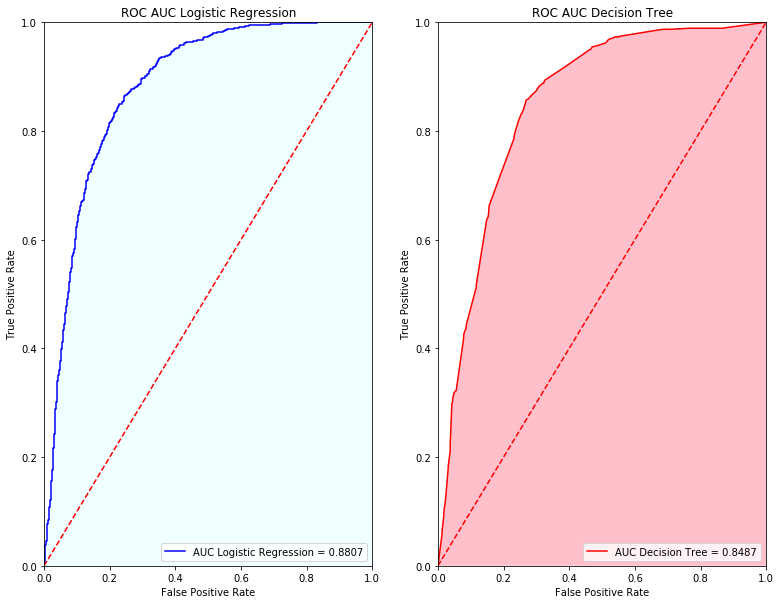

In [32]:
plt.figure(figsize=(20,10))
plt.subplot(131)
plt.title('ROC AUC Logistic Regression')
plt.plot(fpr_lr, tpr_lr, 'blue', label='AUC Logistic Regression = {}'.format(round(roc_auc_lr,4)))
plt.plot([0,1],[0,1], 'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.fill_between(fpr_lr,tpr_lr, 0, facecolor='azure', alpha=1)
plt.legend(loc = 'lower right')

plt.subplot(132)
plt.title('ROC AUC Decision Tree')
plt.plot(fpr_dtr, tpr_dtr, 'red', label='AUC Decision Tree = {}'.format(round(roc_auc_dtr,4)))
plt.plot([0,1],[0,1], 'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.fill_between(fpr_dtr,tpr_dtr, 0, facecolor='pink', alpha=1)
plt.legend(loc = 'lower right')

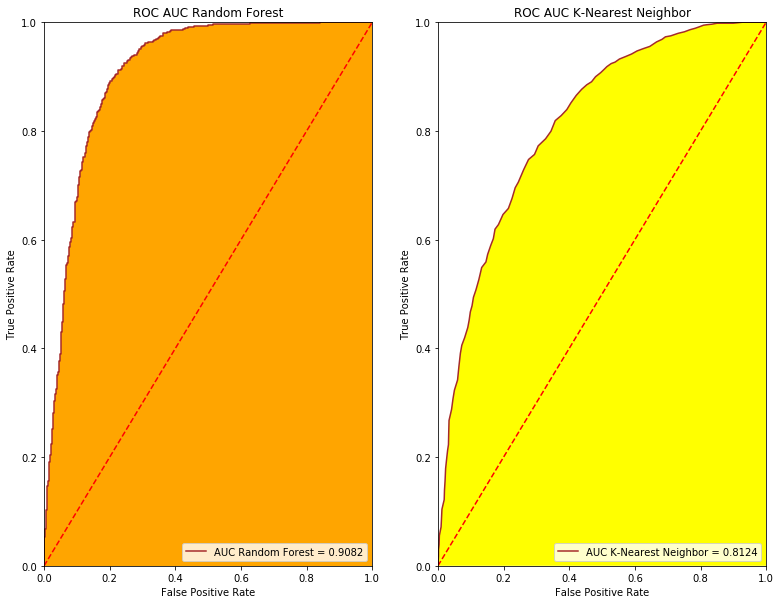

In [33]:
plt.figure(figsize=(20,10))
plt.subplot(131)
plt.title('ROC AUC Random Forest')
plt.plot(fpr_rfc, tpr_rfc, 'brown', label='AUC Random Forest = {}'.format(round(roc_auc_rfc,4)))
plt.plot([0,1],[0,1], 'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.fill_between(fpr_rfc,tpr_rfc, 0, facecolor='orange', alpha=1)
plt.legend(loc = 'lower right')

plt.subplot(132)
plt.title('ROC AUC K-Nearest Neighbor')
plt.plot(fpr_knn, tpr_knn, 'brown', label='AUC K-Nearest Neighbor = {}'.format(round(roc_auc_knn,4)))
plt.plot([0,1],[0,1], 'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.fill_between(fpr_knn, tpr_knn, 0, facecolor='yellow', alpha=1)
plt.legend(loc = 'lower right')

I choose Random Forest Classifier as my best estimator.

In [34]:
ypr = best_rfc.predict(X_test)
trial = pd.DataFrame({'actual': y_test, 'pred': ypr}, dtype='int64')
trial.sort_values('actual',inplace=True)
trial.reset_index(inplace=True)
trial.head

<bound method NDFrame.head of       index  actual  pred
0      5487       0     0
1      5700       0     0
2     10571       0     1
3      9749       0     0
4      8567       0     1
...     ...     ...   ...
2228   2525       1     0
2229   4408       1     1
2230   2785       1     1
2231   4781       1     1
2232   5000       1     0

[2233 rows x 3 columns]>

TP:  936
TN:  938
FP:  218
FN:  141


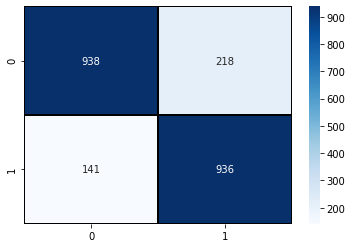

In [35]:
conmax = confusion_matrix(y_test, ypr)
tn, fp, fn, tp = conmax.ravel()
sns.heatmap(data=conmax, annot=True, linewidth=0.7, linecolor="k", fmt=".0f", cmap="Blues")
print("TP: ", tp)
print("TN: ", tn)
print("FP: ", fp)
print("FN: ", fn)

In [36]:
trial.head(100)[trial['actual'] != trial['pred']].count()

index     21
actual    21
pred      21
dtype: int64

In [37]:
trial.head(100)[trial['actual'] == trial['pred']].count()

index     79
actual    79
pred      79
dtype: int64

In [38]:
joblib.dump(best_rfc, "model", compress = 5)

['model']